In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# read data into a DataFrame
data = pd.read_csv(r'Advertising.csv', index_col=0,header=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
print(data.dtypes)
print(data.shape)
print(data.describe())

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object
(200, 4)
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [ ]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

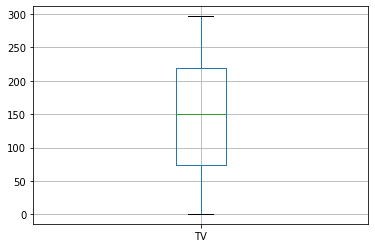

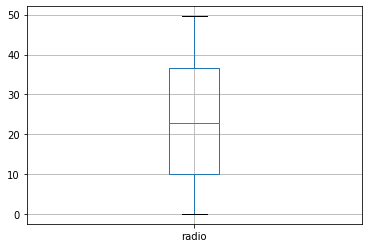

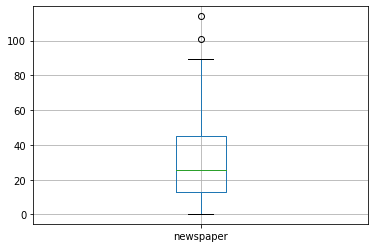

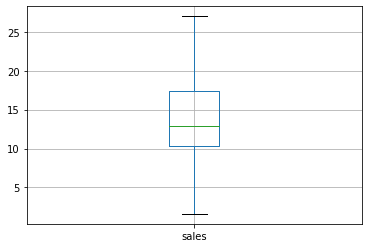

In [ ]:
#Assumption 1: There should be no outliers in the data. Check using boxplot.
for i in data.columns:
    data.boxplot(column=i)
    plt.show()

<Figure size 2160x1080 with 0 Axes>

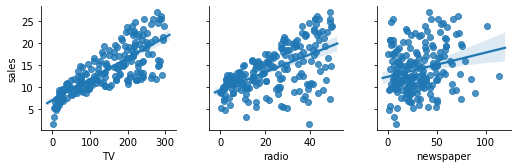

In [ ]:
#Assumption 2:Assumption of Linearity:Every ind var should have a linear relationship with the dep var.
plt.figure(figsize=(30,15))
sns.pairplot(data,x_vars=data.columns[0:-1],y_vars="sales",
             kind='reg')
plt.show()

In [ ]:
data.columns[0:-1]

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [ ]:
# create X and Y
X = data[['TV', 'radio', 'newspaper']]
Y = data['sales']
#X=data.iloc[:,0:-1]

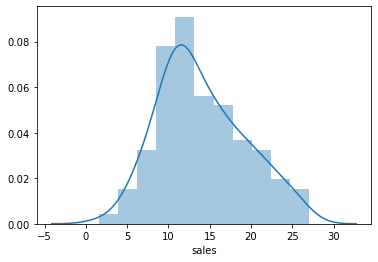

In [ ]:
#Assumption of Normality: The dependent variable should follow an approximate normal distribtion
sns.distplot(Y,hist=True)

In [ ]:
"""
# Log transformation
import numpy as np
Y_log  = np.log(Y)
"""

'\n# Log transformation\nimport numpy as np\nY_log  = np.log(Y)\n'

In [ ]:
#sns.distplot(Y_log,hist=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3EE458048>,
      dtype=object)

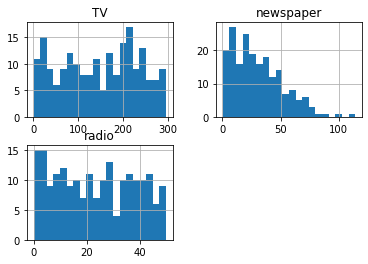

In [ ]:
X.hist(bins=20)

In [ ]:
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = X.apply(lambda i: skew(i.dropna()))
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]

print(data_num_skew)
print(data_num_skewed)
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
X

,TV,radio,newspaper
1,230.1,37.8,4.251348
2,44.5,39.3,3.830813
3,17.2,45.9,4.252772
4,151.5,41.3,4.085976
5,180.8,10.8,4.084294
...,...,...,...
196,38.2,3.7,2.694627
197,94.2,4.9,2.208274
198,177.0,9.3,2.001480
199,283.6,42.0,4.207673


                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


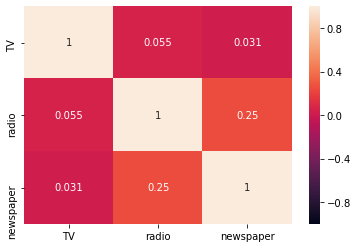

In [ ]:
#Assumption of no multicollinearity: There should be no multicolliearity between the independent variables
corr_df=X.corr(method="pearson")
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,TV,3.39
1,radio,3.63
2,newspaper,5.44


In [ ]:
#X.drop("newspaper",axis=1,inplace=True)
#rerun the VIF code

In [ ]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state=10)  


In [ ]:
print(Y_train)

191    10.8
8      13.2
27     15.0
139     9.6
59     23.8
       ... 
114    15.9
65     18.0
16     22.4
126    10.6
10     10.6
Name: sales, Length: 160, dtype: float64


In [ ]:
#>1000-->test_size=0.3
#<1000-->test_size=0.2

In [ ]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
#train the model object
lm.fit(X_train,Y_train)

# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)



3.3532913858151527
[ 0.0437425   0.19303708 -0.04895137]


In [ ]:
# pair the feature names with the coefficients
print(list(zip(X.columns, lm.coef_)))

[('TV', 0.04374250157742165), ('radio', 0.19303707897345296), ('newspaper', -0.04895136822248785)]


In [ ]:
X1=100
X2=200
X3=0
Y_pred=3.3532913858151474+(0.0437425 *X1)+(0.19303708*X2)+(-0.04895137*X3)
print(Y_pred)

46.334957385815144


In [ ]:
#predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)

[18.15026866 12.96136899 18.05815332 23.66025079 20.68751041 14.26325872
 14.92774472 21.38847375 21.14752911 12.75788534 23.99735583  7.20632737
 12.30777109 19.22813333 19.41581583 13.44985803 19.62619644  9.24667496
 21.1052867  20.87838433 15.52611251 10.91695579 22.82910679 15.82915597
 17.40742204  8.17170435 11.88738387 12.69866637 21.71275044  7.94920205
 12.49118989 20.43292079  4.71443086  4.72126238 16.7504848  15.74384945
  6.74775596 17.73750244  9.01170001 13.60841593]


In [ ]:
lm.score(X_train, Y_train)

0.920898664750022

In [ ]:
new_df=pd.DataFrame()
new_df=X_test

new_df["Actual sales"]=Y_test
new_df["Predicted sales"]=Y_pred
new_df


C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,TV,radio,newspaper,Actual sales,Predicted sales
60,210.7,29.5,2.332144,18.4,18.150269
6,8.7,48.9,4.330733,7.2,12.961369
21,218.4,27.7,3.996364,18.0,18.058153
199,283.6,42.0,4.207673,25.5,23.660251
53,216.4,41.7,3.703768,22.6,20.687510
20,147.3,23.9,3.000720,14.6,14.263259
163,188.4,18.1,3.280911,14.9,14.927745
56,198.9,49.4,4.110874,23.7,21.388474
70,216.8,43.9,3.339322,22.3,21.147529
3,17.2,45.9,4.252772,9.3,12.757885
